# Slope fields

You can either run this in binder https://mybinder.org/v2/gh/JonasRademacker/JupyterNotebooksForTeachingMath/master?filepath=SlopeFields.ipynb ,

or - much better, although a bit hasslesome the first time you set it up - you can run it on your own computer. To do that:

1) Download and install anaconda (https://www.anaconda.com/).

2) Download this file from github. Do so by clicking on "Raw", and then asking your browser to save the file (in Firefox: File -> Save Pages As...) or get the entire set of notebooks via: git clone https://github.com/JonasRademacker/JupyterNotebooksForTeachingMath.git

3) Open a terminal window, go to the directory where this file is, and type: jupyter notebook

This file should now open in your browser (again), and you can edit it and execute and save the code.

Remember, to excecute each field, do shift+return. Execute the fields in order. If things got messy, go to Kernel and select Restart and Clear all output - and start Shift+Return from the top. Or select Restart and Run All.

## The Code

Step 1: import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma

from sympy import *
import matplotlib.pyplot as plt
init_session()
init_printing(use_unicode=True)

from IPython.display import display, Math, Latex

from collections.abc import Iterable

import seaborn as sns
sns.set()
sns.set_style("whitegrid", {'grid.linestyle': '--'})

# remove/comment line below to get plots in a seperate window
%matplotlib inline


IPython console for SymPy 1.6.1 (Python 3.8.3-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6.1/



In [93]:
def SlopeField(Derivative, xrange=np.arange(-5, 5, 1), yrange=np.arange(-5, 5, 1), scale=None):
    deriv = sympify(Derivative)
    lam_deriv = lambdify((x, y), deriv, "numpy")
    X, Y = np.meshgrid(xrange, yrange)
    U = 1
    V = lam_deriv(X, Y) 
    U /= np.sqrt(U**2 + V**2)
    V /= np.sqrt(U**2 + V**2)
    plt.quiver.ShowArrowHead = 'off'
    Q = plt.quiver(X, Y, U, V, units='width', pivot='mid', headlength=0, headwidth=1, scale=scale)
    Q.ShowArrowHead = 'off'
    
def PlotSolution(Solution, xrange=np.arange(-10, 10, 0.1)):
    sol = sympify(Solution)
    lam_sol = lambdify(x, sol, "numpy")
    plt.plot(xrange, lam_sol(xrange),linewidth=3)

def PlotSlopefieldAndSolutions(Derivative   # a string
                               , Solutions=()  # a tuple of strings ("sol1", "sol2")
                               , xrange=(-5, 5, 1), yrange=(-5, 5, 1), scale=None):

    sols = ()
    if type(Solutions) == type("string"):
        sols = (Solutions,)
    else:
        sols = Solutions
        
    plt.figure(figsize=(15,15))
    plt.axis('scaled');
    xeps=(xrange[1]-xrange[0])/100
    yeps=(yrange[1]-yrange[0])/100
    plt.xlim([xrange[0]-xeps, xrange[1]+xeps])
    plt.ylim([yrange[0]-yeps, yrange[1]+yeps])

    xrangeStep=1
    yrangeStep=1
    if len(xrange) > 2:
        xrangeStep = xrange[2]
        
    if len(yrange) > 2:
        yrangeStep = yrange[2]
        
    xrangeD = np.arange(xrange[0], xrange[1], xrangeStep)
    yrangeD = np.arange(yrange[0], yrange[1], yrangeStep)
    xrangeS = np.arange(xrange[0], xrange[1], xrangeStep/100)

    SlopeField(Derivative, xrangeD, yrangeD, scale)
    for sol in sols:
        PlotSolution(sol, xrangeS)
        
    plt.show()
    


## Using the code

### To plot a slope field

To plot a slope field, bring the differential equation into the form $y' = f(x, y)$, and then execute

PlotSlopefieldAndSolutions("f(x,y)", xrange=(xmin, xmax, step), yrange=(ymin, ymax, step))

where you can change the x and y range as appropriate. The third number in the x and y range indicates the spacing beetween the little asymptote snippets the programme draws. A smaller value will give more, smaller slopes.

### To plot a slope field and a solution
To add a solution s=y(x), do 

PlotSlopefieldAndSolutions("f(x,y)", "s(x)", xrange=(xmin, xmax, step), yrange=(ymin, ymax, step))

### To plot a slope field and several solutions

PlotSlopefieldAndSolutions("f(x,y)", ("s1(x)", "s2(x)", "s3(x)"), xrange=(xmin, xmax, step), yrange=(ymin, ymax, step))

Note the location of the commas and the brackets - these are important to get right in order to avoid frustration.


## Examples

$\frac{dy}{dx} = cos(x)$ (see Boas, section 1, example 3)

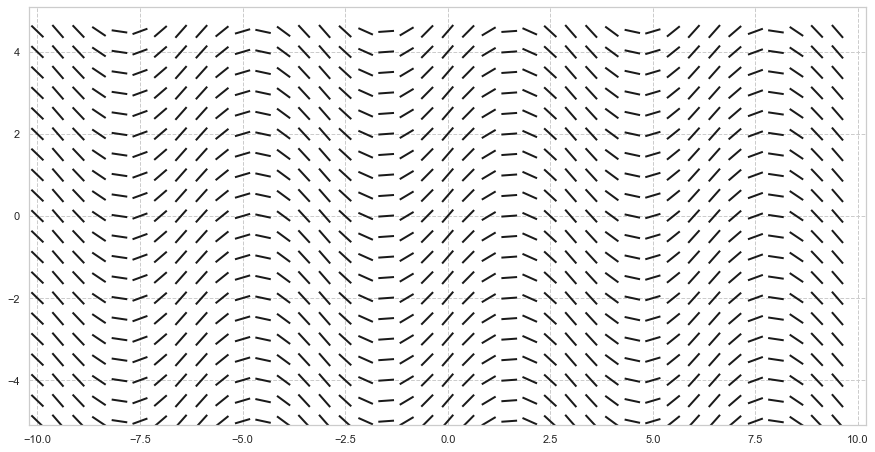

In [94]:
PlotSlopefieldAndSolutions("cos(x)", xrange=(-10, 10, 0.5), yrange=(-5, 5, 0.5))
# This shows only the slope field, not the solution. 
# But even if we did not know what the solution is, we get a good idea of how it looks like.

We know the solution, $y = \sin(x) + C$. Let's add one of them to the plot:

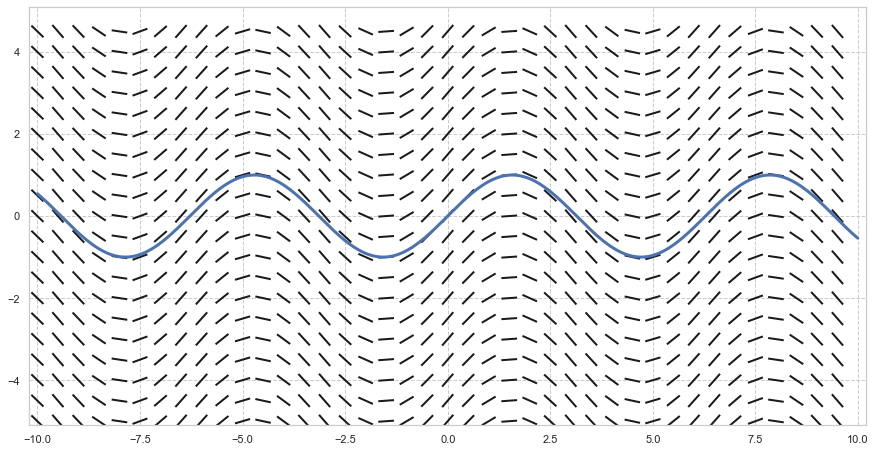

In [95]:
PlotSlopefieldAndSolutions("cos(x)", "sin(x)", xrange=(-10, 10, 0.5), yrange=(-5, 5, 0.5))

Let's add a few:

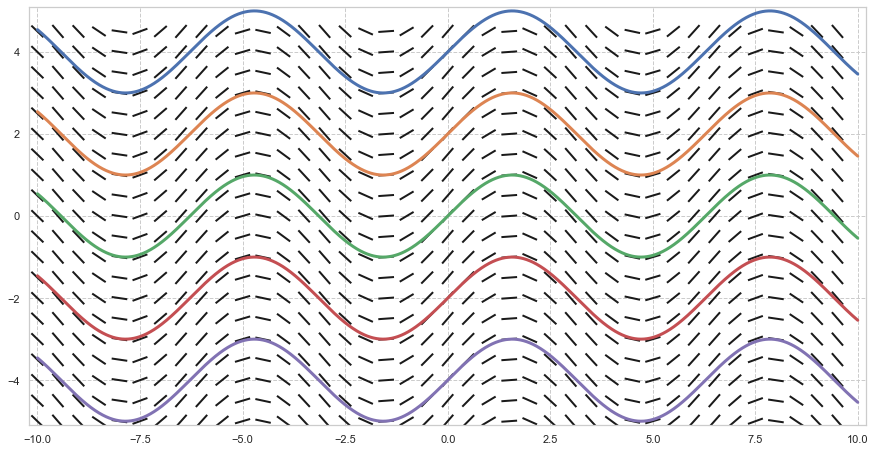

In [96]:
PlotSlopefieldAndSolutions("cos(x)", ("sin(x)+4", "sin(x)+2", "sin(x)", "sin(x)-2", "sin(x)-4"), xrange=(-10, 10, 0.5), yrange=(-5, 5, 0.5))

$ x \frac{df}{dx} = y$
You can solve this using the seperation of variables technique.

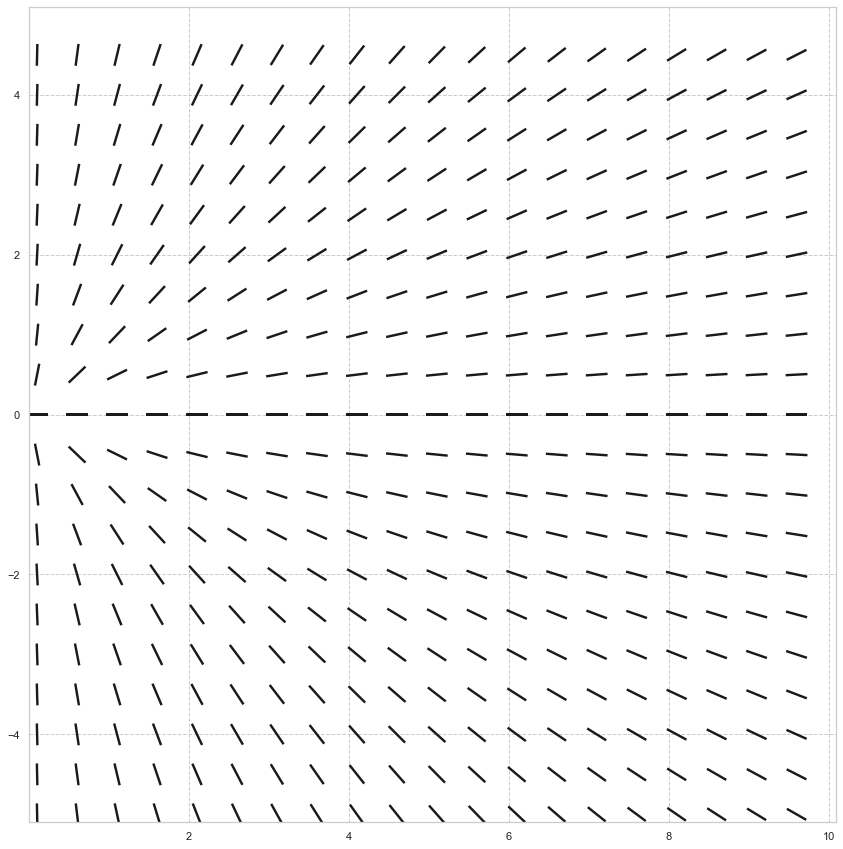

In [97]:
PlotSlopefieldAndSolutions("y/x", xrange=(0.1, 10, 0.5), yrange=(-5, 5, 0.5)) 
# add one or more solutions as a second argument as in the example above.

$ x^2 y' + 3xy = 1$

$\frac{dy}{dx} = \frac{1}{x^2} - 3\frac{y}{x}$ if $x\neq 0$.


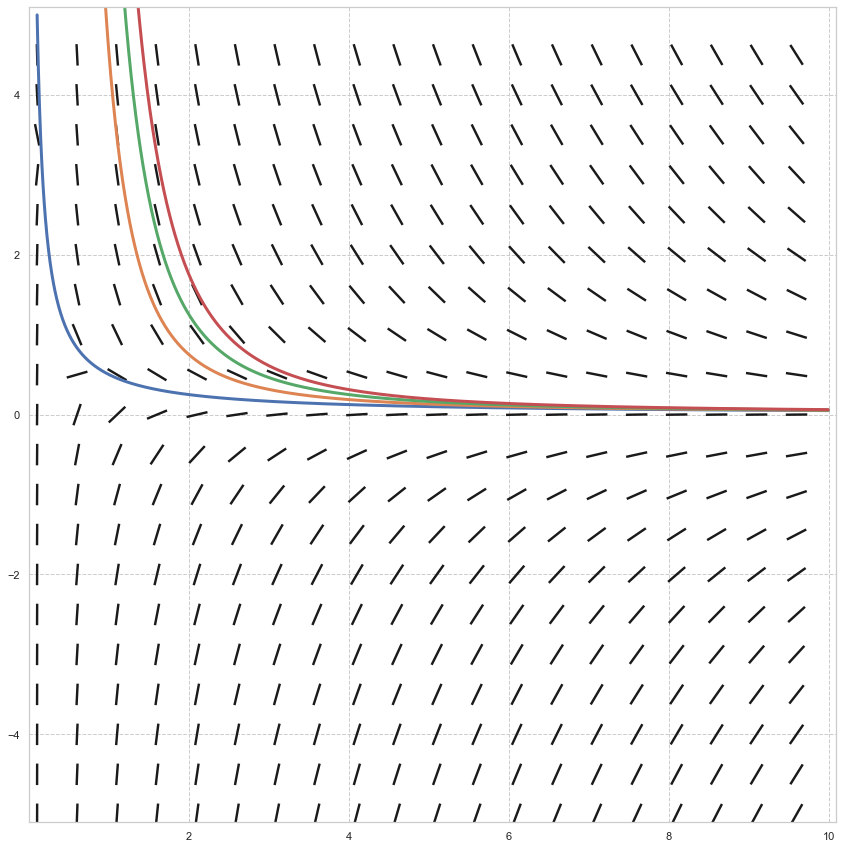

In [98]:
PlotSlopefieldAndSolutions("1/x**2 - 3*y/x", ("1/(2*x) + 0/x^3", "1/(2*x) + 4/x^3", "1/(2*x) + 8/x^3", "1/(2*x) + 12/x^3"), xrange=(0.1, 10, 0.5), yrange=(-5, 5, 0.5)) 